In [ ]:
from keras.datasets               import cifar100
from keras.utils                  import np_utils
from keras.models                 import Sequential
from keras.layers                 import Dense, Activation, BatchNormalization, Dropout, LSTM
from keras.layers                 import Conv2D
from keras.layers                 import MaxPooling2D
from keras.layers                 import Flatten
from keras.callbacks              import EarlyStopping 
from tensorflow.keras.optimizers  import SGD
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.image             import imread


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
###########################################################################################################
from keras import datasets, Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np
from keras.utils import np_utils
from keras.datasets import cifar10
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from keras.preprocessing import  image
from keras.preprocessing.image import load_img, img_to_array,array_to_img,ImageDataGenerator
import numpy as np
import os
import cv2 as cv
danhsach = ['1K','2K','5K','10K','20K','50K','100K','500K']
dir_train = '/content/drive/MyDrive/MoneyWithCNN' 
distpath = []
y_train = []
x_train = []
x_test = []
y_test = []
# Tạo dữ liệu
def create_data(dir, x_train, y_train):
  for i in danhsach:
    path = os.path.join(dir,i)
    index_label = danhsach.index(i)
    for j in os.listdir(path):
      img_path = os.path.join(path, j)
      img = image.load_img(img_path, target_size=(200,200))
      img = img_to_array(img)
      img = img.reshape(200,200,3) 
      img = img.astype('float32')
      img = img/255
      x_train.append(img)
      y_train.append(index_label)
#tạo dữ liệu
create_data(dir_train, x_train, y_train)  
# xử lí dữ liệu
x_train = np.array(x_train)
y_train = np.array(y_train)
y_train = np_utils.to_categorical(y_train)
print(x_train.shape) 
print(y_train.shape)


(360, 200, 200, 3)
(360, 8)


In [ ]:
model=Sequential()
# Block 1/3
model.add(Conv2D(32, (3, 3), activation='relu', 
                 kernel_initializer='he_uniform', 
                 padding='same', 
                 input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))
##################################################
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(8, activation='sigmoid'))


In [ ]:
opt=SGD(learning_rate=0.01,momentum=0.9)
model.compile(loss='binary_crossentropy',optimizer=opt, metrics=['accuracy'])
history = model.fit(x_train,y_train,epochs = 10)


Epoch 1/10
12/12 [==============================] - 11s 821ms/step - loss: 3.5300 - accuracy: 0.1639
Epoch 2/10
12/12 [==============================] - 10s 791ms/step - loss: 0.3859 - accuracy: 0.2917
Epoch 3/10
12/12 [==============================] - 13s 1s/step - loss: 0.2172 - accuracy: 0.8556
Epoch 4/10
12/12 [==============================] - 11s 868ms/step - loss: 0.1062 - accuracy: 0.9694
Epoch 5/10
12/12 [==============================] - 9s 779ms/step - loss: 0.0520 - accuracy: 0.9806
Epoch 6/10
12/12 [==============================] - 10s 786ms/step - loss: 0.0266 - accuracy: 0.9972
Epoch 7/10
12/12 [==============================] - 9s 776ms/step - loss: 0.0174 - accuracy: 0.9972
Epoch 8/10
12/12 [==============================] - 10s 786ms/step - loss: 0.0124 - accuracy: 1.0000
Epoch 9/10
12/12 [==============================] - 10s 789ms/step - loss: 0.0094 - accuracy: 1.0000
Epoch 10/10
12/12 [==============================] - 9s 785ms/step - loss: 0.0069 - accuracy: 1.

In [ ]:
model.save('/content/drive/MyDrive/MoneyWithCNN/Money.h5')

Giá trị dự đoán: 5
50.000vnd


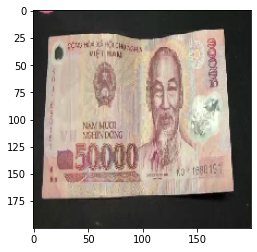

In [ ]:
pic = image.load_img('/content/drive/MyDrive/MoneyWithCNN/50K/nammuoingandong.0.jpg', target_size=(200,200))
plt.imshow(pic)
pic = img_to_array(pic)
pic = pic.reshape(1,200,200,3) 
pic = pic.astype('float32')
pic = pic/255
np.argmax(model.predict(pic), axis=1)
print('Giá trị dự đoán:', np.argmax(model.predict(pic)))
if np.argmax(model.predict(pic)) == 0:
   print("1.000vnd")
if np.argmax(model.predict(pic)) == 1:
   print("2.000vnd")
if np.argmax(model.predict(pic)) == 2:
   print("5.000vnd")
if np.argmax(model.predict(pic)) == 3:
   print("10.000vnd")
if np.argmax(model.predict(pic)) == 4:
   print("20.000vnd")
if np.argmax(model.predict(pic)) == 5:
   print("50.000vnd")
if np.argmax(model.predict(pic)) == 6:
   print("100.000vnd")
if np.argmax(model.predict(pic)) == 7:
   print("500.000vnd")